# HCAIM Hackathon Challenge 2 - Starter Notebook

This notebook is designed to help introduce participants to the HCAIM Hackathon Challenge 2: Analysis of Vulnerable Datasets. Run this notebook in Colab to get started. Please read the supporting documentation for a full overview of the challenge. 

In [2]:
#pandas will let us work with dataframes
import pandas as pd
import numpy as np

If you have little previous experience with pandas you should first review this ["10 minutes to pandas" tutorial](https://pandas.pydata.org/docs/user_guide/10min.html).

# Examine the Data

The bank has publically released three anonymised dataset containing sensitive information about their customers based in California. They have asserted that the anonymisation of the datasets was robust.

You have been hired to assess this claim.

The bank provides you with the personally identifiable information (pii) of all their past California-based customers. This is information that, if obtained through any means, could be used by an attacker to identify individuals in the anonymised datasets. Your goal is to assess whether linking the pii to the anonymouse data is possible.

We'll start by taking a look at the available data. 

In [5]:
# load in the data
data_url = 'https://raw.githubusercontent.com/DavidLSmyth/HCAIM_Hackathon_Deidentification_Challenge/main/data/'

# Anonymized data
credit_card_data = pd.read_csv(data_url + "CreditCardData.csv")
fico_credit_score_data = pd.read_csv(data_url + "FicoCreditScore.csv")
transactions_data = pd.read_csv(data_url +  "CreditCardTransactions.csv", dtype={'Merchant Zip': 'str'})

# Personally identifiable information
pii_data = pd.read_csv(data_url + "PersonalIdentifiableInfo.csv")

Let's take a look at each dataset.

### FicoCreditScore.csv
This anonymized dataset was released to investigate the correlations between home address and credit risk.

Each row represents the information of a unique anonymized customer of the bank. All of the banks past California-based customers are contained in the dataset.

The bank has made the following column descriptions publicly available:

- **City**: The city where the individual lives
- **Latitude**: The latitude geographic coordinate of the individuals home location.
- **Longitude**: The longitude geographic coordinate of the individuals home location.
- **Gender**: The individuals gender
- **Birth Year**: The birth year of the individual
- **Yearly Income - Person**: The individuals yearly income
- **FICO Score**: The individuals FICO score
- **Num Credit Cards**: The number of credit cards the individual has possessed in their time as a customer at the bank.
- **ID_2**: A unique ID to identify each individual in the dataset

In [ ]:
fico_credit_score_data.head()

,City,Latitude,Longitude,Gender,Birth Year,Yearly Income - Person,FICO Score,Num Credit Cards,ID_2
0,Oxnard,34.140000,-119.100000,Male,1995,$28703,560,1,127
1,Fremont,37.560000,-121.980000,Male,1996,$68767,723,3,148
2,Lakeside,32.900000,-116.890000,Female,1985,$46361,743,2,24
3,Milpitas,37.427498,-121.899108,Male,1981,$68827,755,2,35
4,Los Angeles,33.960000,-118.270000,Female,1970,$22583,683,4,39


### CreditCardData.csv
This anonymized dataset was released to investigate the credit card turn-over rates and usage of the banks customers.

The card information of all of the bank's previous California-based customers are contained in the dataset. Each row in the dataset represents the information of a single credit/debit card owned by a single customer (where *ID_3* identifies the customer and *CARD INDEX* distinguishes each of their cards). Since customers can have multiple credit/debit cards, many customers have multiple entries in this dataset.

The bank has made the following column descriptions publicly available:
- **Name Initials:** The initials of the card owners full name 
- **CARD INDEX:** An index which identifies the card (for each individual). An individual may have more than one card.
- **Card Brand:** Brand of card
- **Card Type:** Type of card (debit/credit)
- **Expires:** Card expiry date
- **Has Chip:** Whether the card has a chip
- **Credit Limit:** Credit limit on the card
- **Acct Open Date:** Date the card account was opened
- **ID_3:** A unique ID to identify each individual in the dataset

In [ ]:
credit_card_data.head()

,Name Initials,CARD INDEX,Card Brand,Card Type,Expires,Has Chip,Credit Limit,Acct Open Date,ID_3
0,AB,0,Visa,Credit,04/2021,NO,$4300,12/2013,0
1,AB,1,Visa,Debit,02/2021,NO,$38900,06/2013,0
2,KR,0,Mastercard,Debit,08/2023,YES,$10462,03/2008,1
3,KR,1,Amex,Credit,12/2012,YES,$11000,07/2011,1
4,KR,2,Visa,Debit,12/2023,YES,$16927,03/2014,1


### CreditCardTransactions.csv
This anonymized dataset was released to investigate credit-card in customer transactions.

The dataset contains info from all credit/debit card transactions made by the bank's Californian customers **in the year of 2019**. Each row represents an individual transaction, and customers can have multiple entries in the dataset.

The bank has made the following column descriptions regarding credit card transactions publicly available: 
- **CARD INDEX**: Identifies the card (for each individual). An individual may have more than one card.
- **Time**: time of the transaction
- **Date**: the date of the transaction
- **Amount**: how much money transferred
- **Use Chip**: whether the cards chip was used to perform transaction
- **Merchant Name**: Identifies merchant/seller (‘natural’ value removed).
- **Merchant City**: City in which merchant is located
- **Merchant State**: State in which merchant is located
- **Merchant Zip**: The merchant’s zipcode
- **Is Fraud**: Whether the transaction was fraudulent
- **ID_4**: A unique ID to identify each individual in the dataset


In [ ]:
transactions_data.head()

,CARD INDEX,Time,Date,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Merchant Zip,Is Fraud?,ID_4
0,0,06:02,2019-01-05,$120.30,Chip Transaction,7522433618679272954,Princeton,MA,1541,No,0
1,0,20:10,2019-01-06,$68.43,Chip Transaction,-2744911404133435018,North Grafton,MA,1536,No,0
2,0,10:18,2019-01-09,$59.17,Chip Transaction,-4693979874497918566,North Grafton,MA,1536,No,0
3,0,13:13,2019-01-11,$16.07,Chip Transaction,7522433618679272954,Princeton,MA,1541,No,0
4,0,05:54,2019-01-12,$132.82,Chip Transaction,1913477460590765860,Sturbridge,MA,1566,No,0


### PersonalIdentifiableInformation.csv
This is the dataset containing Pii that you have obtained. Your goal is to take the persons contained in this dataset and identify their information in the anonymised datasets.

All of the banks past California-based customers are contained in this dataset. Each row represents a unique customer. You may assume that all customers in the other datasets are a subset (or an equivalent set) of the customers in this Pii dataset.

The bank has privately provided us the following column descriptions:
 
- **Person**: Name of the person
- **Birth year**: persons birth year
- **Birth Month**: persons birth month
- **Gender**: Persons gender
- **Address**: Street address of the individual
- **Apartment**: Apartment number of the individual
- **City**: City of residence of the individual
- **State**: State of residence of the individual
- **ID_1**:  unique ID to identify each individual in the dataset

In [ ]:
pii_data.head()

,Person,Birth Year,Birth Month,Gender,Address,Apartment,City,State,ID_1
0,Stevie Macron,2001,9,Female,3371 Madison Boulevard,NaN,Camp Pendleton,CA,185
1,Brycen Bell,1961,11,Male,50 Spruce Street,NaN,Sacramento,CA,23
2,Makai Lee,1994,8,Male,9181 Elm Avenue,NaN,Stockton,CA,117
3,Kieran Rogers,1996,12,Male,1430 Elm Avenue,9089.0,Fremont,CA,126
4,Juliette Howard,1965,9,Female,393 Mountain View Lane,NaN,Newport Coast,CA,150


In each dataset, the *ID* columns are used to uniquely identify each person contained in the dataset. But because the datasets are anonymised a persons *ID* will be different across the datasets. Your goal is find what each persons *ID* is in each dataset. If these *ID*s are correctly linked you will have deanonymised their data.

Note that it is not possible to de-anonymise all the data -- some persons may not be contained in all datasets, and in some cases there is simply not enough information to find a unique match.

We want to try to figure out whether an attacker can link these datasets. If this is the case, they could potentially use this information for malevolent purposes. Now it's time for you to get creative! How can these datasets be used in combination to reveal sensitive information about individuals? Let's take a look at a toy example for some inspiration to get us started. 

# Toy Example: Linking two datasets
Let's pretend a 5k race has been organised. The names and ages of all participating runners have been published on the race website. When taking payment details, only the card number and ages of participants are stored in order to mitigate against a privacy breach. 

In [ ]:
#pretend we publish a dataset of names and ages for participants of a 5k race.
toy_names = pd.DataFrame({"name": ["Aden Adams", "Leighton Cook", "Kieran Rogers", "Faith Myers", "Kallie Rodriguez"], "gender": ['M', 'M', 'M', 'F', 'F'], "age": [23, 54, 38, 70, 23]})
#now pretend some credit card info from the race payments got leaked. Not a full blown disaster as the names weren't released, so any malevolent use may be detected by asking for name verification 
toy_vulnerable_bank_info = pd.DataFrame({"creditCardNumber": [43534, 3453445, 34543, 3534, 45451], "age": [38, 70, 23, 54, 23]})

So, there two datasets have been collected:
- *toy_names*
- *toy_vulnerable_bank_info*.

In [ ]:
toy_names

,name,gender,age
0,Aden Adams,M,23
1,Leighton Cook,M,54
2,Kieran Rogers,M,38
3,Faith Myers,F,70
4,Kallie Rodriguez,F,23


In [ ]:
toy_vulnerable_bank_info

,creditCardNumber,age
0,43534,38
1,3453445,70
2,34543,23
3,3534,54
4,45451,23


Now let's assume that an attacker has somehow obtained both datasets. And we'll pretend that credit card number is no good without a name for verification purposes.

How can the attacker link the two datasets to get the information they need?

By using the pandas [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) function!

In [ ]:
names_with_bank_info = toy_names.merge(toy_vulnerable_bank_info, on = "age")
names_with_bank_info

,name,gender,age,creditCardNumber
0,Aden Adams,M,23,34543
1,Aden Adams,M,23,45451
2,Kallie Rodriguez,F,23,34543
3,Kallie Rodriguez,F,23,45451
4,Leighton Cook,M,54,3534
5,Kieran Rogers,M,38,43534
6,Faith Myers,F,70,3453445


The datasets have been merged here using the overlapping age information. Lets see how many unique matches were found (we do so using the pandas [value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) function):



In [ ]:
# Check number of unique matches made
names_with_bank_info['name'].value_counts()

Aden Adams          2
Kallie Rodriguez    2
Leighton Cook       1
Kieran Rogers       1
Faith Myers         1
Name: name, dtype: int64

The attacker has found unique matches for "Leighton Cook", "Kieran Rogers", and "Faith Myers". With these name and card numbers matched the attack can now drain their bank accounts!

However, since since "Aden Adams" and "Kallie Rodriguez" both have the same age (23 years old), a unique match was not made. Unfortunately for the attacker, they have no means of determining which credit-card number match is correct for these individuals. As such, rather than risking using incorrect details and being flagged for suspicious activity, they decide to drop the non-unique matches (using the pandas [drop_duplicates](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html) function).

This leaves the attacker with only the matches that are guaranteed to be correct:

In [ ]:
names_with_bank_info = names_with_bank_info.drop_duplicates(subset=['name'], keep=False)
names_with_bank_info

,name,gender,age,creditCardNumber
4,Leighton Cook,M,54,3534
5,Kieran Rogers,M,38,43534
6,Faith Myers,F,70,3453445


This is a very simple example of a linkage attack. By using auxiliary information (the participants age), we were able to link a name with a credit card number.

For the runners with the same age, we would need further auxiliary information shared between the the datasets (e.g. a postcode) to uniquely identify their credit-card numbers.

**For a more detailed example of a linkage attack see the [programming-dp de-identification guide](https://programming-dp.com/notebooks/ch1.html).** We strongly advise following this guide to understand how these types of attacks can be performed.

# Getting Started
Consider the following tips as inspiration for your linkage attacks: 
- Overlapping columns between datasets tend to be useful.
- Sometimes it's possible to narrow down possibilities by matching multiple columns in one dataset against multiple columns in another dataset.
- Sometimes you can derive or infer features which can be matched. For example, given a zip code you may be able to derive the city/town, or visa versa.
- Sometimes making assumptions can help narrow down info (for example some names may statistically be more likely to be given to certain genders).
- Before you dive into your implementation, make sure you (i) understand the nature of each dataset and (ii) have thought of some potential strategies that could be used to link them

## Additional Python Tips

Now we present some example **pandas manipulations** that may be useful in the challenge.

To check how many customers are in a dataset you can call the pandas [nunique](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html) function on the *ID* column. For example:

In [ ]:
pii_data['ID_1'].nunique()

244

To check how many times each customer is contained in a dataset you can use the [value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) function.

In [ ]:
transactions_data['ID_4'].value_counts()
# ID_4 on left and count on right

1101    4444
1838    4051
1150    4008
960     3842
486     3244
        ... 
662      226
168        2
1942       2
784        1
279        1
Name: ID_4, Length: 188, dtype: int64

here the ID is displayed in the left column and the value count is conatined in the right column (so the person whose ID_4=1101 is contained in 4444 rows of this dataset). When you make a merge you should use *value_counts()* to check there are no duplicate *ID*s in the merged dataset.

When dealing with datasets where customers has multiple entries, you may find it useful to calculate aggregate information about the customer. This can be achieved using pandas [groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) and [aggregate](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) functions (you can find some detailed examples of their workings in this [pandas groupby tutorial](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)).

For example, to find the date in which each customer made the most transactions (their 'mode' transaction date), the folloing can be performed:

In [ ]:
temp = transactions_data.groupby(by='ID_4')['Date'].agg(pd.Series.mode)
temp.head()

ID_4
0                               2019-05-09
2                               2019-07-03
4     [2019-04-27, 2019-06-11, 2019-07-26]
27                              2019-08-12
35                              2019-02-15
Name: Date, dtype: object

The following cell reformats the output dataframe (using pandas [reset_index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html)) and ensures only a single mode is taken when multiple are found.

In [ ]:
temp = transactions_data.groupby(['ID_4'])['Date'].agg(lambda x : x.mode().iloc[0]).reset_index(name='Most common date')
temp.head()

,ID_4,Most common date
0,0,2019-05-09
1,2,2019-07-03
2,4,2019-04-27
3,27,2019-08-12
4,35,2019-02-15


Another example is using *groupby* to calculate the number of dates each customer made a transaction:

In [ ]:
temp = transactions_data.groupby(by='ID_4')['Date'].nunique().reset_index(name='Num transaction dates')
temp.head()

,ID_4,Num transaction days
0,0,358
1,2,365
2,4,336
3,27,282
4,35,364


TODO: add geopy hint

# Submission

**Your submission should be in the form of a .csv file containing the columns [*ID_1*, *ID_2*, *ID_3*, *ID_4*]** -- where each row represents a customer and each column their linked *ID*s from the respective datasets.

If your submitted csv does not contain the columns [*ID_1*, *ID_2*, *ID_3*, *ID_4*], you will recieve a score of 0.

Within the csv you may only attempt to match with any given *ID_1* once -- All rows containing *ID_1* duplicates will be forcibly removed before evaluation.

**Your submission can be uploaded at TODO INSErT!!!!**. The file should be named ‘TeamName_Challenge2_Submission.csv’. Each team can submit a maximum of 5 times and their results will be conveyed back to them.

You are not required to complete this challenge using this notebook, and are required to submit this notebook.

## Scoring

*ID_1* is contained in the Pii dataset and represents the customers ‘base’ ID.

Thus, each correct ID matched to *ID_1* adds 1 point to your score. Each incorrect ID matched to *ID_1* subtracts 1 point from your score.
If no matches for a person were found, you should omit the individual from your submission. If some, but not all, *ID*s were matched, insert NaNs where no match was found – this will prevent a points deduction due to an incorrect guess. NaNs can be inserted using the numpy library: np.nan.

For example, consider person A whose true *ID*s across the four datasets are:

- ID_1 = 0
- ID_2 = 5
- ID_3 = 3
- ID_4 = 9

If you submit a csv with a row [0,5,3,1], you would receive 1 point for matching ID_1=0 and ID_2=5, 1 point for matching ID_1=0 and ID_3=3 and -1 point for incorrectly matching ID_1=1 and ID_4=1, giving a total of 1 point. If instead you submitted [0,5,3,np.nan], you would receive 2 points.

In [ ]:
sample_submission = pd.DataFrame({"ID_1" : [0], "ID_2" : [5], "ID_3": [3], "ID_4": np.nan})

In [ ]:
sample_submission

,ID_1,ID_2,ID_3,ID_4
0,0,5,3,NaN


For reference, if all customers are succesfully matched a score of 723 (244 x 3 = 732) would be obtained -- 244 customers with 3 matches each (ID_1 matched to ID_2, ID_3, and ID_4).

However, there is not enough information available to correctly make each match. Our solution notebook, which completes the most important links, obtains a score of 568 (although this score *can* be imporved on).



To save you file for submission:

In [ ]:
sample_submission.to_csv('TeamName_Challenge2_Submission.csv', index=False)

The file will be saved in the location displayed in the image below. You can then download it for submission.

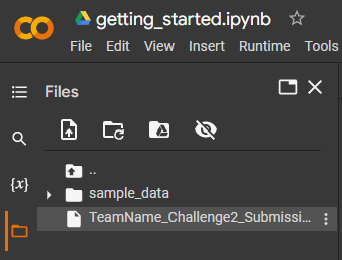

## Final Tips
- Remember, your goal is to identify customers in the anonymised datasets. This is achieved by matching *ID*s. Your score remains the same regardless of whether an identified person has 10 transactions or 10,000 transactions in *transactions_data* -- you only get 1 point for matching *ID_1* to *ID_4*.
- Remember it is not possible to de-anonymise all the data - so if you are only matching a subsection of the customers you may still be making good progress!
- Since it is not possible to uniquely link all the datasets you need to be wary of any duplicates obtained from *pd.merge()* -- These duplicates can significantly hurt your score! Make sure to constantly use *value_counts()* to ensure you are not carrying around  (you should call seperately on each ID). And if any duplicates are found, you can use the *drop_duplicates()* function to remove them. But make sure to avoid excessive dropping (e.g. if ID_1, ID_2, and ID_3 are good matches but ID_4 is a duplicate you shouldn't remove the whole row but just change ID_4 to np.nan).